In [2]:
def parse(input):
  input = [l.strip().split(':') for l in open(input, 'r').readlines()]
  input = [(a, list(l.strip().split(' '))) for a, l in input]
  input = dict(input)
  return input

parse('sample')

{'jqt': ['rhn', 'xhk', 'nvd'],
 'rsh': ['frs', 'pzl', 'lsr'],
 'xhk': ['hfx'],
 'cmg': ['qnr', 'nvd', 'lhk', 'bvb'],
 'rhn': ['xhk', 'bvb', 'hfx'],
 'bvb': ['xhk', 'hfx'],
 'pzl': ['lsr', 'hfx', 'nvd'],
 'qnr': ['nvd'],
 'ntq': ['jqt', 'hfx', 'bvb', 'xhk'],
 'nvd': ['lhk'],
 'lsr': ['lhk'],
 'rzs': ['qnr', 'cmg', 'lsr', 'rsh'],
 'frs': ['qnr', 'lhk', 'lsr']}

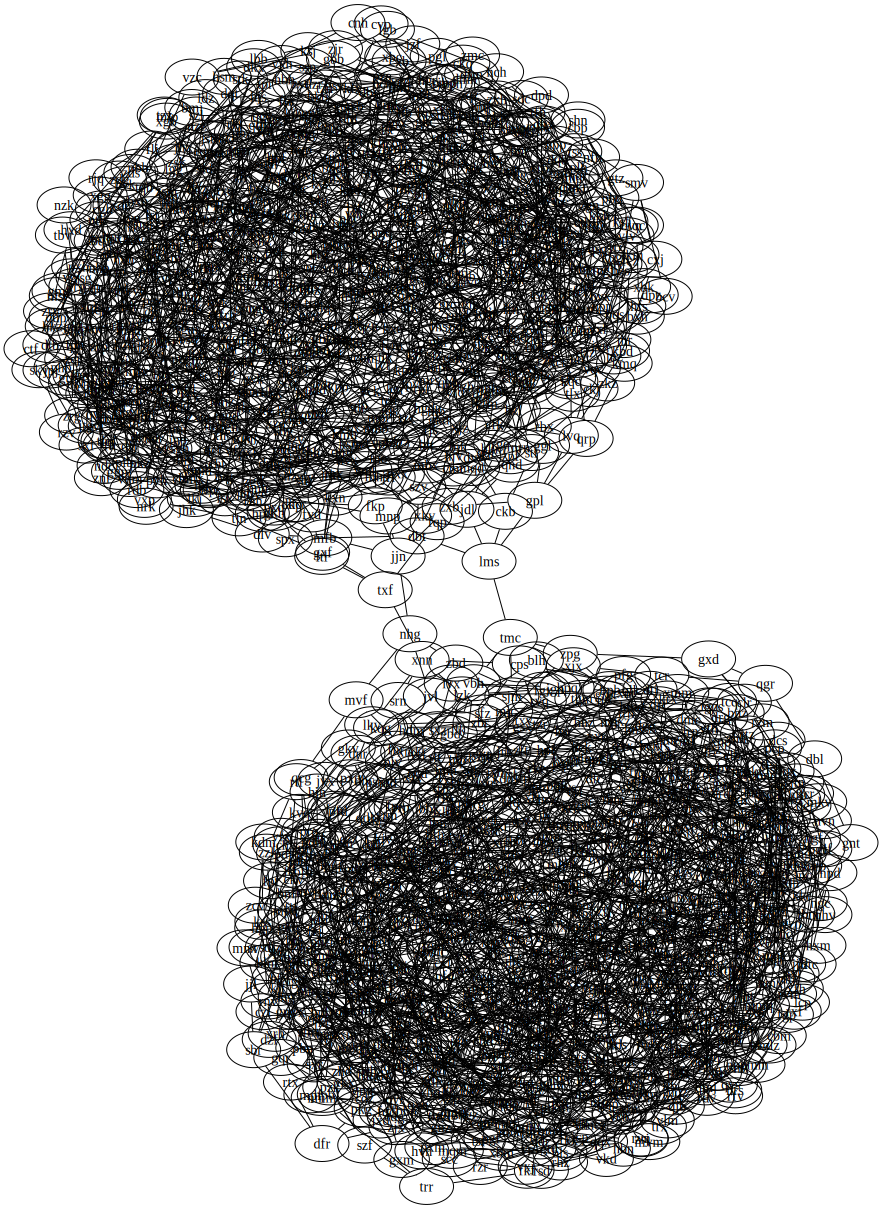

In [66]:
import graphviz

g = graphviz.Graph(engine='neato')
data = parse('input')
for a, l in data.items():
  for b in l:
    g.edge(a, b)

g

In [6]:
from itertools import combinations

def find_groups(components, cuts):
  to_visit = set(components.keys())
  result = []

  while to_visit:
    a = to_visit.pop()
    seen = set()
    queue = [a]

    while queue:
      a = queue.pop()
      seen.add(a)
      to_visit.discard(a)
      if a in components:
        for b in components[a]:
          if b not in seen and (a, b) not in cuts and (b, a) not in cuts:
            queue.append(b)
    result.append(len(seen))
  return result

def first_part(input):
  result = dict()

  for a, l in input.items():
    if a not in result:
      result[a] = []
    for b in l:
      if b not in result:
        result[b] = []
      if a not in result[b]:
        result[b].append(a)
      if b not in result[a]:
        result[a].append(b)

  g = find_groups(result, set([('lms', 'tmc'), ('jjn', 'nhg'), ('txf', 'xnn')]))
  assert len(g) == 2
  return g[0] * g[1]

first_part(parse('input'))

562912